# Planning Observations with Ch'asca-Astroplan

In [1]:
from chasca import cha
%matplotlib inline

## Getting list of observatories

Ch'asca uses astroplan to help people to plan astronomical observations. To print a list of observatories currently available to use with astroplan just use the get_sites() function.

In [2]:
#cha.get_sites()  -----> uncomment this

If your observatory is not within the above list, you can create one by entering longitude, latitude and elevation manually:

In [3]:
lon       = -140.476 #in deg
lat       = 30.825   #in deg
elevation = 3239     #in m
new_obs = cha.set_obs(lon, lat, elevation)
new_obs

<Observer: location (lon, lat, el)=(-140.476 deg, 30.824999999999996 deg, 3239.0000000006485 m),
    timezone=<UTC>>

Note that once you have defined the location of the observatory, you will need to set observatory ='new' in some of the functions shown below. 

## Object Visibility

Ch'asca allow us to know whether a star is visible from a given observatory. For that you'll need to define some parameters such as right ascension, declination, observatory and time.

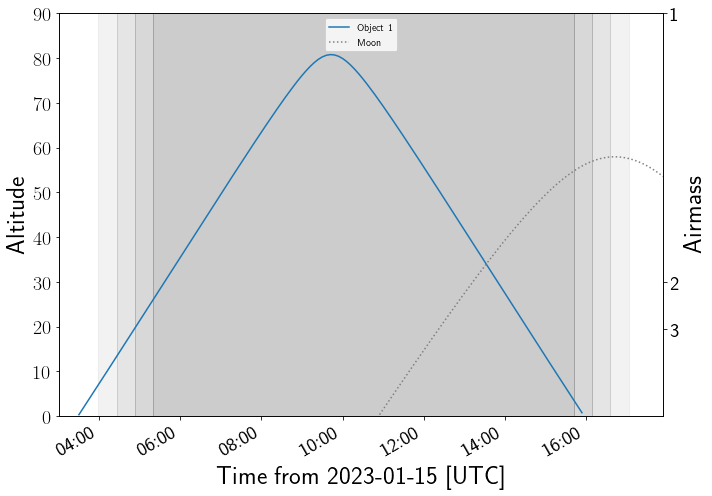

In [4]:
starid = 'Object 1'             #just to name the object
ra     = 104.528428158847       #always in deg
dec    = 10.6426624525331       #always in deg
site   = 'Keck Observatory'
time   = '2023-01-15'

cha.plan_one_obs(starid, site, time, by='coord', ra=ra, dec=dec, savefig='yes')

Note that we just use the star's coordinates (by='coord' function) to generate the plot shown above. It will be saved in pdf format if the savefig function is used. We can also use the name of the star to see its visibility.

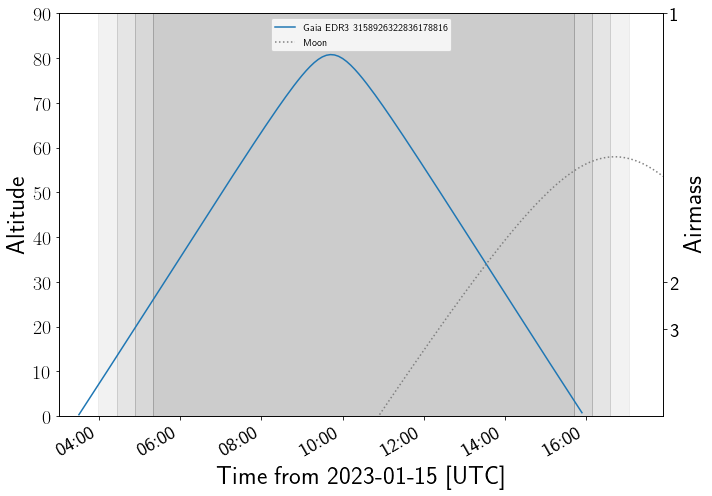

In [5]:
starid = 'Gaia EDR3 3158926322836178816'
cha.plan_one_obs(starid, site, time)

If you want to use the new observatory defined above, you just have to take on the observatory function:

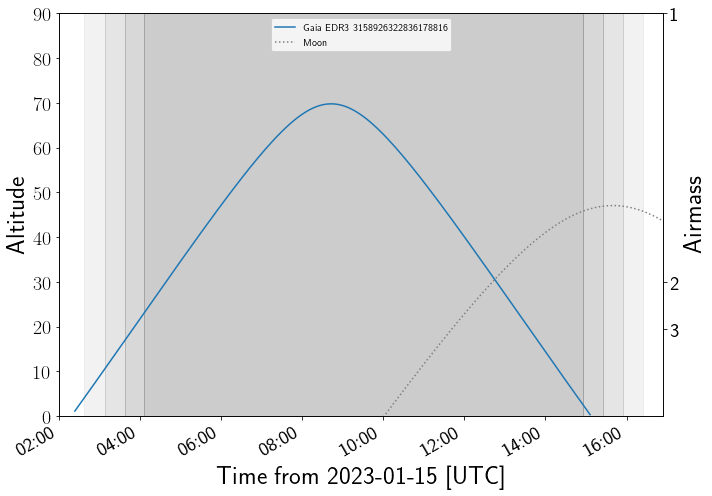

In [6]:
starid = 'Gaia EDR3 3158926322836178816'
cha.plan_one_obs(starid, new_obs, time, observatory='new')

## Lunar Separation

Depending on the kind of observation, it is preferable to observe stars far from the Moon. For instance, for stellar magnetic activity studies, the distance between the full Moon and the star should be greater than 27 degrees. Ch'asca, through the astroplan package, helps to determine this distance in a simple way.

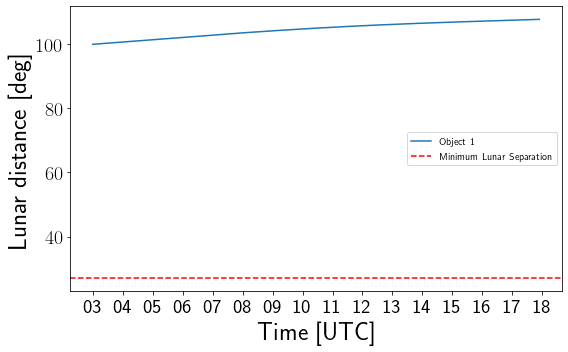

In [7]:
starid = 'Object 1'
ra     = 104.528428158847
dec    = 10.6426624525331
site   = 'Keck Observatory'
time   = '2023-01-15'

cha.moon_sep(starid, site, time, by='coord', ra=ra, dec=dec, savefig='yes')

Again, you can use only the star's name to get its distance relative to the Moon.

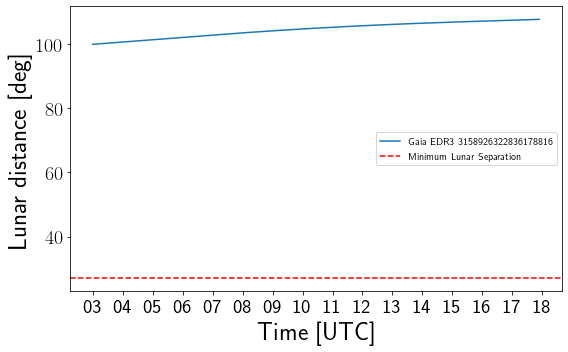

In [8]:
starid = 'Gaia EDR3 3158926322836178816'
cha.moon_sep(starid, site, time)

## Sky Position

If this is your first time conducting an observation and the sky is not completely dark because of clouds (eternal enemies of astronomers), you might want to observe stars in cloudless regions. Ch'asca will show you the position of a given star in the sky.

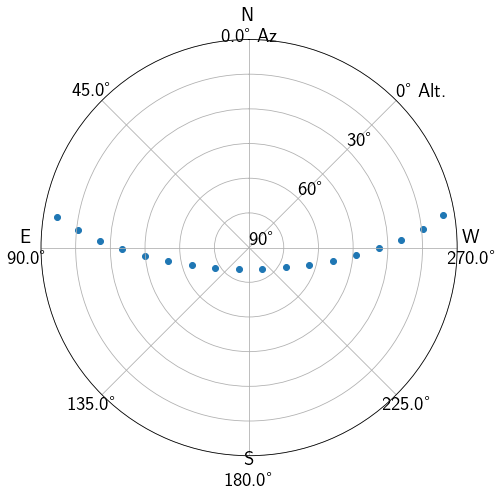

In [9]:
starid = 'Object 1'
ra     = 104.528428158847
dec    = 10.6426624525331
site   = 'Keck Observatory'
time   = '2023-01-15'
cha.sky_position(starid, site, time, by='coord', ra=ra, dec=dec, savefig='yes')

At this point, you have probably already noted that Ch'asca is very easy to use as it always employs the same functions. For example, you can use again the star's name to get the above plot.

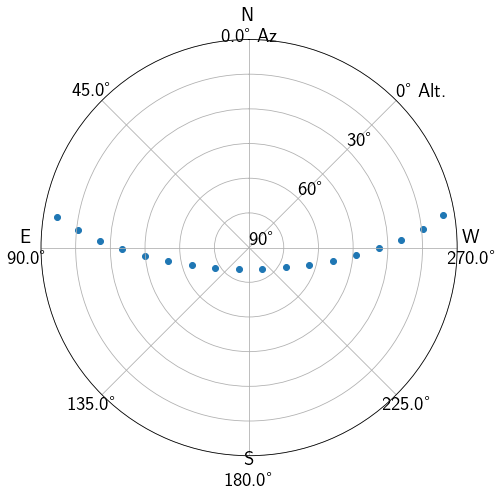

In [10]:
starid = 'Gaia EDR3 3158926322836178816'
cha.sky_position(starid, site, time)

## Finding Chart

It is always very important to verify that you are observing the correct star.

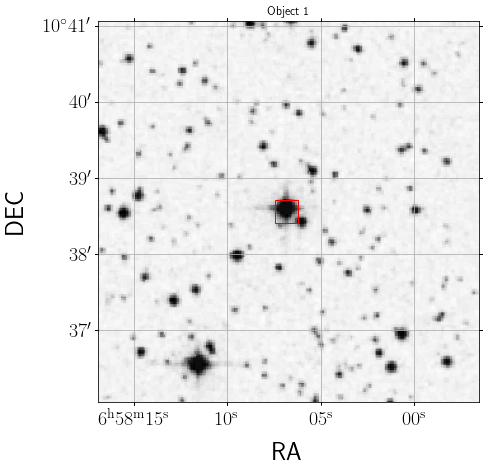

In [11]:
starid = 'Object 1'
ra     = 104.528428158847
dec    = 10.6426624525331
cha.fch_obs(starid, by='coord', ra=ra, dec=dec, savefig='yes')

Note that the red square indicates the true position of the star. You can also use the star's name to obtain its chart. To reduce the size of the chart, use the radius function (in arcmins).

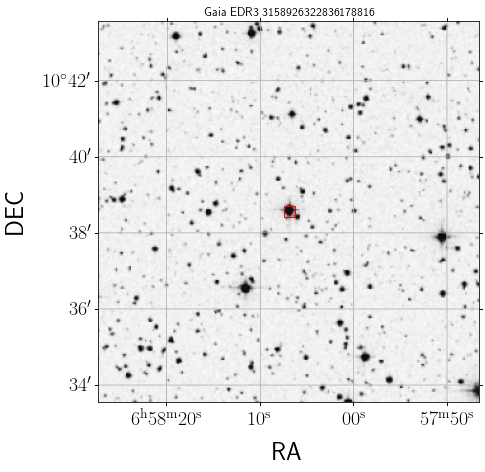

In [12]:
starid = 'Gaia EDR3 3158926322836178816'
radius = 10   #by default 5 arcmins
cha.fch_obs(starid, radius)

## All in One

You can get all four (Object Visibility, Lunar Separation, Sky Position, and Finding Chart) in one plot using the star's coordinates.

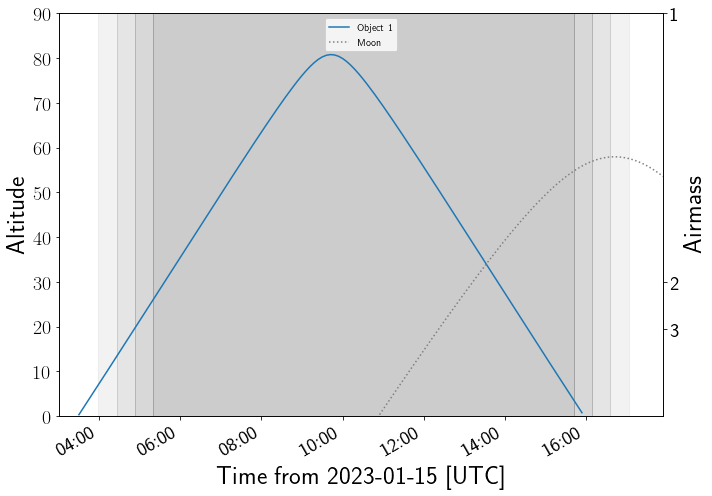

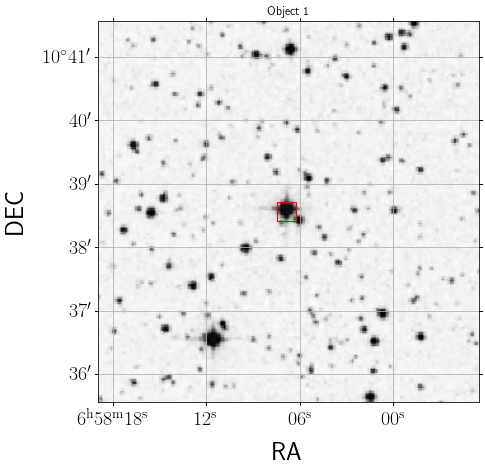

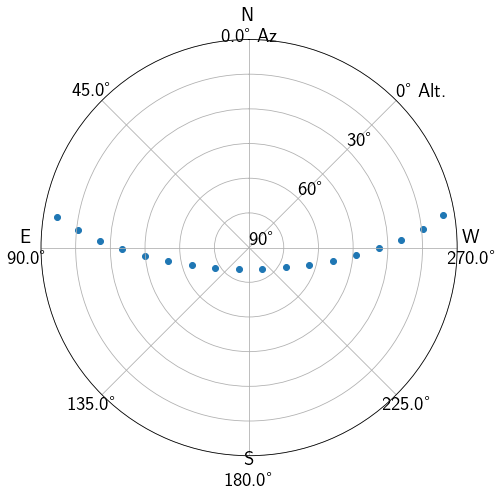

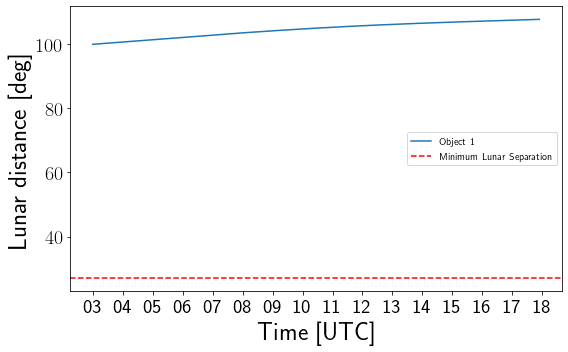

In [13]:
starid = 'Object 1'
ra     = 104.528428158847
dec    = 10.6426624525331
site   = 'Keck Observatory'
time   = '2023-01-15'
radius = 6
cha.plan_all_obs(starid, site, time, radius, by='coord', ra=ra, dec=dec)

Or using star's name. Note that a pdf figure is generated.

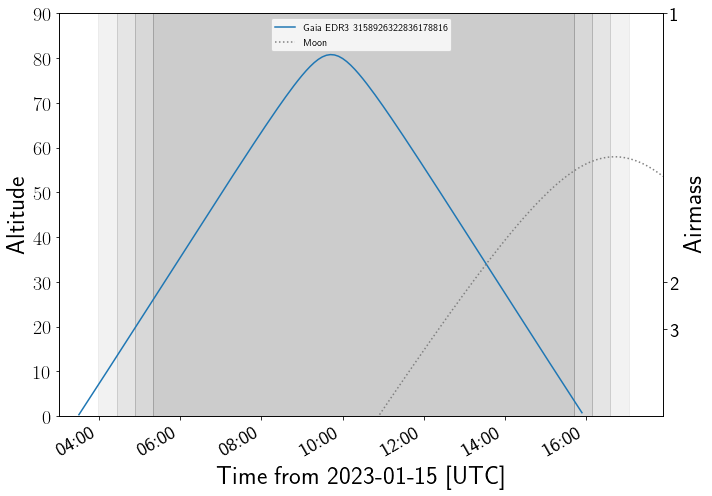

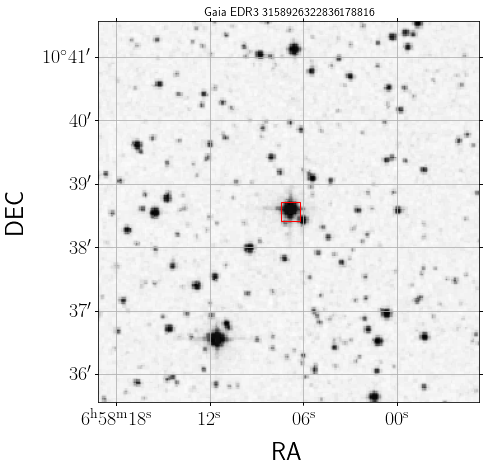

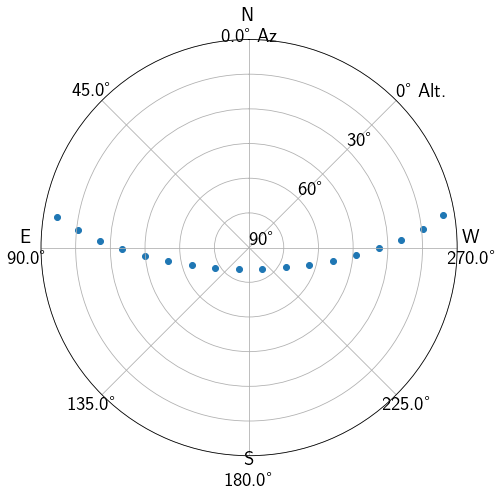

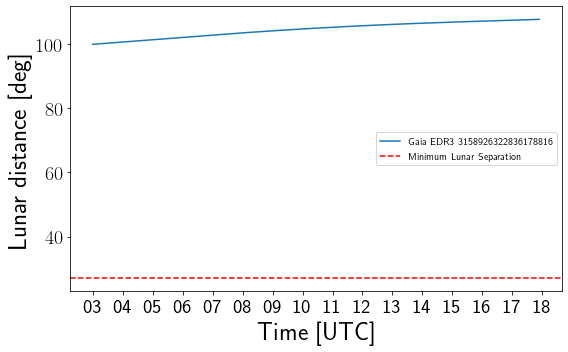

In [14]:
starid = 'Gaia EDR3 3158926322836178816'
cha.plan_all_obs(starid, site, time, radius)

## Multiple Targets

It is also possible to predict the visibility of more than one star using the plan_mult_obs function.

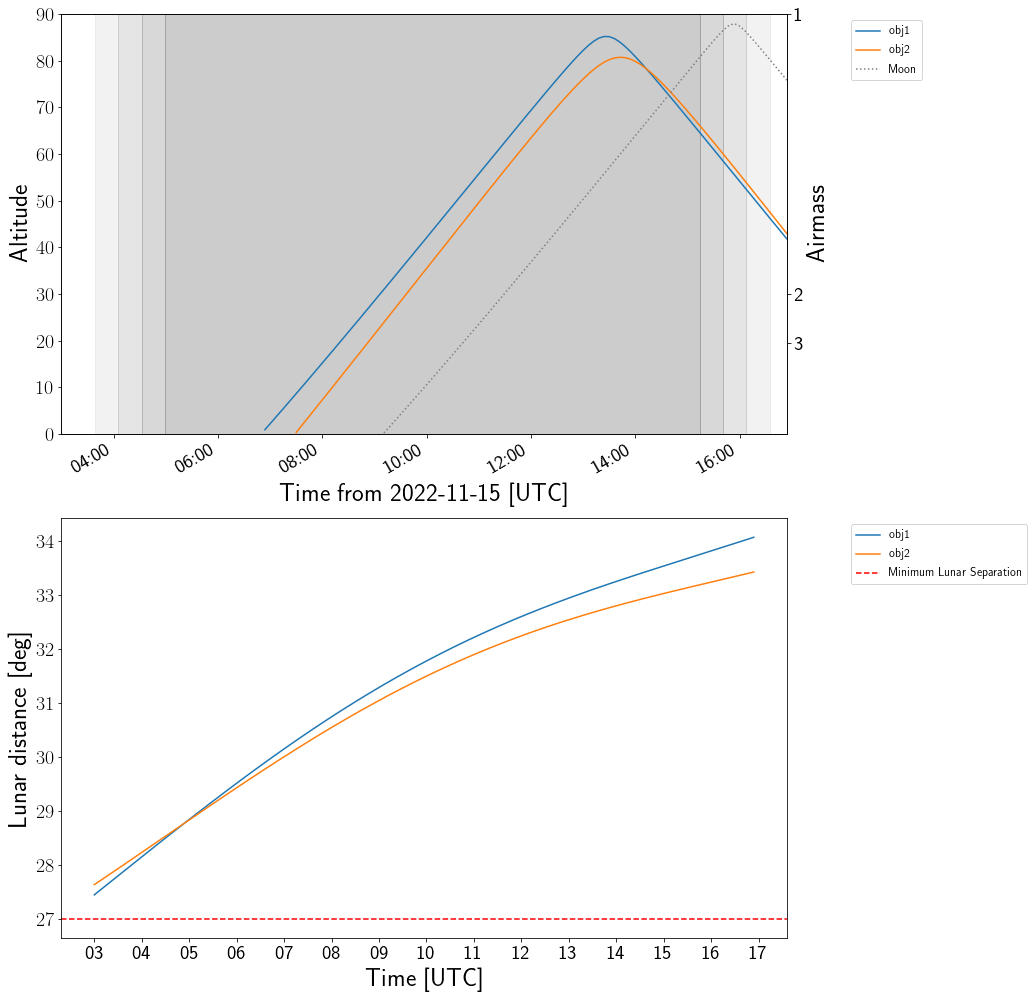

In [15]:
starid = ['obj1', 'obj2']
ra     = [100.393858765048, 104.547911870064]
dec    = [24.6060098344905, 10.6086275258601]
site   = 'subaru'
time   = '2022-11-15'

cha.plan_mult_obs(starid, site, time, by='coord', ra=ra, dec=dec)


And also using the stars's names.

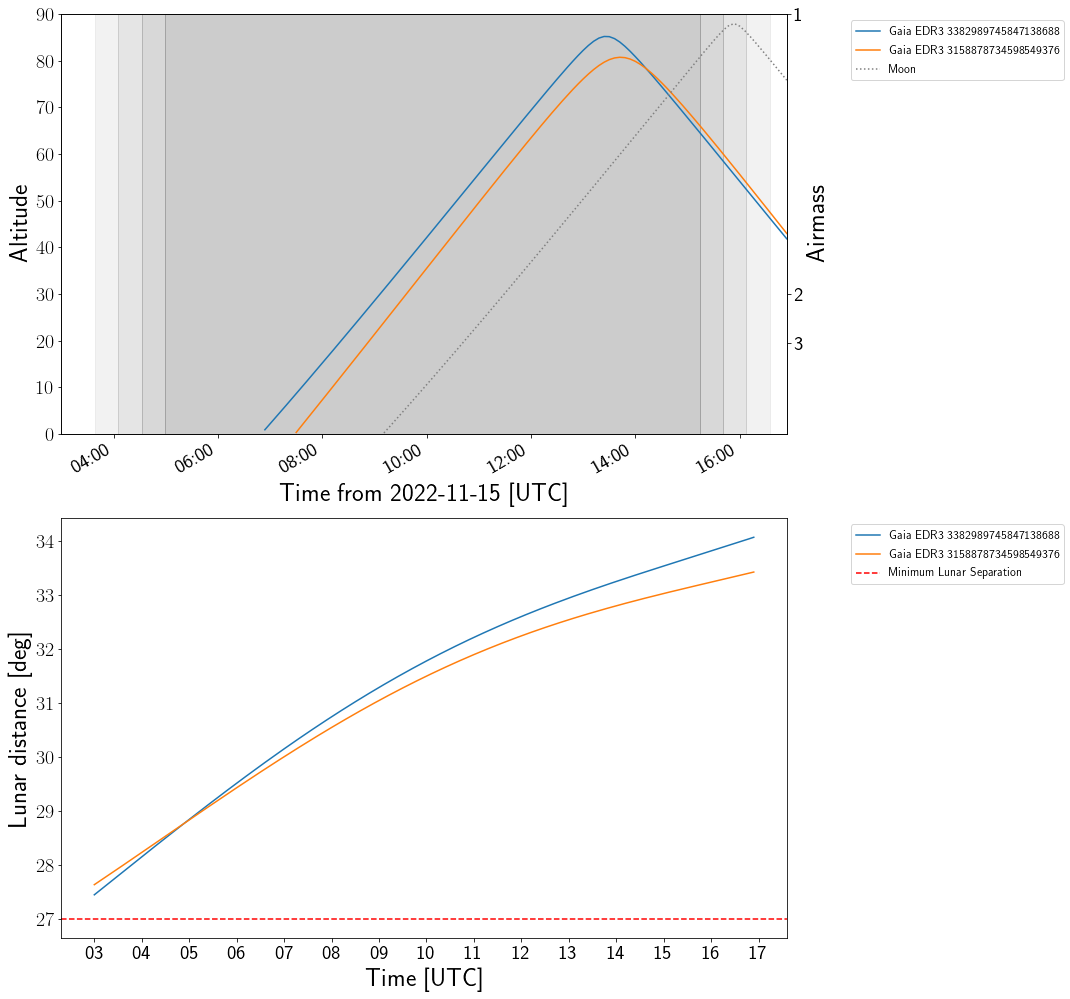

In [16]:
starid = ['Gaia EDR3 3382989745847138688', 'Gaia EDR3 3158878734598549376']
cha.plan_mult_obs(starid, site, time)

## Aditional functions

Ch'asca can also estimate exposure times for the Goodman spectrograph.
Details about the instrument can be found here https://noirlab.edu/science/programs/ctio/instruments/goodman-high-throughput-spectrograph/overview

In [17]:
from chasca import chatool

In [18]:
Texp = chatool.texp_goodman(v=9.2, snr=350, seeing=1.2, grating=2100, slit=0.45)
Texp #in seconds

345.99857948293055

Ch'asca can also estimate exposure times for the MIKE spectrograph. More details abot MIKE here http://www.lco.cl/?epkb_post_type_1=the-mike-magellan-inamori-kyocera-echelle-users-guide

In [19]:
Texp = chatool.texp_mike(v=9.2, snr=250, seeing=1.1, slit=0.35)
Texp

1046.1001514053469

For two-pixel spectral binning. Use with >0.5" slits.

In [20]:
Texp = chatool.texp_mike(v=9.2, snr=250, seeing=1.1, slit=1, bin='yes')
Texp

205.09101186593017

If you already know the Texp necessary to meet a given SNR for a star, you can scale the Texp for another star of different magnitude.

In [21]:
Texp = chatool.esc_texp(v1=9.21, texp1=1102, v2=9.50)
Texp

1437.421700479519

Another useful function is de_to_se. It transforms coordinates from deg to hmsdms. Note that a csv file is generated.

In [22]:
ra     = [100.393858765048, 104.547911870064]
dec    = [24.6060098344905, 10.6086275258601]
chatool.de_to_se(ra=ra, dec=dec)

Ch'asca can also transform magnitudes from the Gaia (EDR3) system to the V Johnson following correlations based on effective temperatures and BP and RP Gaia magnitudes of Sun-like stars. It is useful when you wanna estimate the exposure time (most of them work only with the V Johnson) of a given star, but it has only Gaia magnitudes. 

Let's start with a simple example. Imagine that you wanna estimate the V mag of 18 Sco, but you only have its Gaia magnitudes and effective temperature:

In [23]:
G    = 5.327651
BP   = 5.654931
RP   = 4.837854
Teff = 5823     #taken from Melendez et al 2014 (http://adsabs.harvard.edu/abs/2014ApJ...791...14M)

Let's use the first correlation that depends of effective temperatures.

In [24]:
chatool.G_to_V_teff(G, Teff)

5.482502610777981

If you do not have information about the effective temperature, you can use Gaia photometry.

In [25]:
chatool.G_to_V(G, BP, RP)

5.486826808838358

You can see that both transformations are very similar. In the worst case, where you have only G mag.

In [26]:
chatool.G_to_V(G)

5.5299176101274705

This result is less precise, but considering that the real V mag of 18 Sco is 5.5, we can conclude that all the above transformations are in agreement. It is very important to mention that these transformations are only valid for 5000 K <= Teff <= 6300 K.